<a href="https://colab.research.google.com/github/sm160388/hotel-booking-analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [2]:
# importing important libraries
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
import seaborn as sns                       #visualisation
import plotly.express as px
import folium
sns.set(color_codes=True)                   #default colours are used

Mount the data


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data=pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')

#Let us read our data first

In [5]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [6]:
data.shape

(119390, 32)

In [7]:
list(data.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

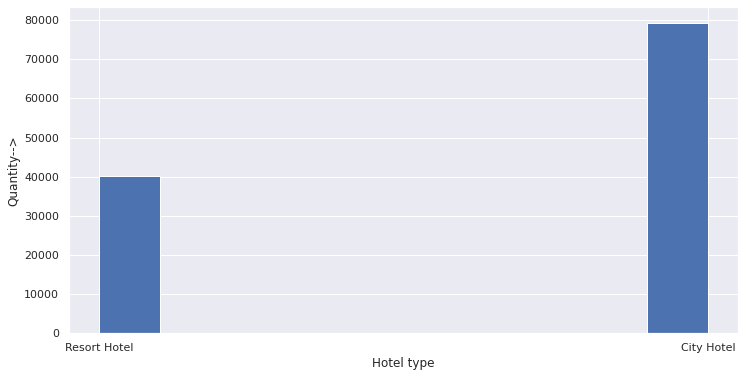

In [8]:
fig, ax= plt.subplots(figsize=(12,6))
ax.hist(data['hotel'])
ax.set_xlabel('Hotel type')
ax.set_ylabel('Quantity-->')
plt.show()

In [9]:
#To rename the column names
data.rename(columns={'hotel':'Hotel','is_canceled':'Cancelled','lead_time':'Lead time','arrival_date_year':'Arrival date year','arrival_date_month':'Arrival date month','arrival_date_week_number':'Arrival date week number','arrival_date_day_of_month':'Arrival date day of month','stays_in_weekend_nights':'Stays in weekend nights','stays_in_week_nights':'Stays in week nights','adults':'Adults','children':'Children','babies':'Babies','meal':'Meal','country':'Country','market_segment':'Market segment','distribution_channel':'Distribution channel','is_repeated_guest':'Repeated guest','previous_cancellation':'Previous cancellation','previous_bookings_not_cancelled':'Previous bookings not cancelled','reserved_room_type':'Reserved room type','assigned_room_type':'Assigned room type','booking_changes':'Booking changes','deposit_typ':'Deposit type','agent':'Agent','company':'Company','days_in_waiting_list':'Days in waiting list','customer_type':'Customer type','adr':'Average daily rate','required_car_parking_spaces':'Required car parking spaces','total_of_special_requests':'Total of special requests','reservation_status':'Reservation status','reservation_status_date':'Reservation status date'},inplace=True)

In [ ]:
data

,Hotel,Cancelled,Lead time,Arrival date year,Arrival date month,Arrival date day of month,Stays in weekend nights,Stays in week nights,Adults,Children,...,Booking changes,deposit_type,Agent,Days in waiting list,Customer type,Average daily rate,Required car parking spaces,Total of special requests,Reservation status,Reservation status date
3,Resort Hotel,0,13,2015,July,1,0,1,1,0,...,0,No Deposit,304,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,1,0,2,2,0,...,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,1,0,2,2,0,...,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,1,0,2,2,0,...,0,No Deposit,303,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,1,0,3,2,0,...,0,No Deposit,240,0,Transient,82.00,0,1,Canceled,2015-05-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,30,2,5,2,0,...,0,No Deposit,394,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,31,2,5,3,0,...,0,No Deposit,9,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,31,2,5,2,0,...,0,No Deposit,9,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,31,2,5,2,0,...,0,No Deposit,89,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [10]:
data.dtypes

Hotel                              object
Cancelled                           int64
Lead time                           int64
Arrival date year                   int64
Arrival date month                 object
Arrival date week number            int64
Arrival date day of month           int64
Stays in weekend nights             int64
Stays in week nights                int64
Adults                              int64
Children                          float64
Babies                              int64
Meal                               object
Country                            object
Market segment                     object
Distribution channel               object
Repeated guest                      int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
Reserved room type                 object
Assigned room type                 object
Booking changes                     int64
deposit_type                       object
Agent                             

**Data Cleaning and** **Preparation**

In [11]:
data=data.drop(columns=['Arrival date week number','Company'])
data.shape
data.head(5)

,Hotel,Cancelled,Lead time,Arrival date year,Arrival date month,Arrival date day of month,Stays in weekend nights,Stays in week nights,Adults,Children,...,Booking changes,deposit_type,Agent,Days in waiting list,Customer type,Average daily rate,Required car parking spaces,Total of special requests,Reservation status,Reservation status date
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,...,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,...,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,...,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [12]:
#rows containing duplicate data
duplicate_rows_data = data[data.duplicated()]
print("Number of duplicate rows:",duplicate_rows_data.shape)

Number of duplicate rows: (32001, 30)


In [ ]:
data.count()

Hotel                             119390
Cancelled                         119390
Lead time                         119390
Arrival date year                 119390
Arrival date month                119390
Arrival date day of month         119390
Stays in weekend nights           119390
Stays in week nights              119390
Adults                            119390
Children                          119386
Babies                            119390
Meal                              119390
Country                           118902
Market segment                    119390
Distribution channel              119390
Repeated guest                    119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
Reserved room type                119390
Assigned room type                119390
Booking changes                   119390
deposit_type                      119390
Agent                             103050
Days in waiting list              119390
Customer type   

In [ ]:
#finding the null values
print(data.isnull().sum())

Hotel                                 0
Cancelled                             0
Lead time                             0
Arrival date year                     0
Arrival date month                    0
Arrival date day of month             0
Stays in weekend nights               0
Stays in week nights                  0
Adults                                0
Children                              4
Babies                                0
Meal                                  0
Country                             488
Market segment                        0
Distribution channel                  0
Repeated guest                        0
previous_cancellations                0
previous_bookings_not_canceled        0
Reserved room type                    0
Assigned room type                    0
Booking changes                       0
deposit_type                          0
Agent                             16340
Days in waiting list                  0
Customer type                         0


In [ ]:
#dropping the missing values
data=data.dropna()  #will drop the not available values
data.count()

Hotel                             102894
Cancelled                         102894
Lead time                         102894
Arrival date year                 102894
Arrival date month                102894
Arrival date day of month         102894
Stays in weekend nights           102894
Stays in week nights              102894
Adults                            102894
Children                          102894
Babies                            102894
Meal                              102894
Country                           102894
Market segment                    102894
Distribution channel              102894
Repeated guest                    102894
previous_cancellations            102894
previous_bookings_not_canceled    102894
Reserved room type                102894
Assigned room type                102894
Booking changes                   102894
deposit_type                      102894
Agent                             102894
Days in waiting list              102894
Customer type   

In [ ]:
#after dropping the values
print(data.isnull().sum())

Hotel                             0
Cancelled                         0
Lead time                         0
Arrival date year                 0
Arrival date month                0
Arrival date day of month         0
Stays in weekend nights           0
Stays in week nights              0
Adults                            0
Children                          0
Babies                            0
Meal                              0
Country                           0
Market segment                    0
Distribution channel              0
Repeated guest                    0
previous_cancellations            0
previous_bookings_not_canceled    0
Reserved room type                0
Assigned room type                0
Booking changes                   0
deposit_type                      0
Agent                             0
Days in waiting list              0
Customer type                     0
Average daily rate                0
Required car parking spaces       0
Total of special requests   

In [ ]:
data.describe()

,Cancelled,Lead time,Arrival date year,Arrival date day of month,Stays in weekend nights,Stays in week nights,Adults,Children,Babies,Repeated guest,previous_cancellations,previous_bookings_not_canceled,Booking changes,Agent,Days in waiting list,Average daily rate,Required car parking spaces,Total of special requests
count,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000
mean,0.390314,111.740092,2016.156977,15.786771,0.978181,2.589655,1.899926,0.111231,0.007697,0.014034,0.077215,0.024365,0.201780,86.545532,2.619579,104.679911,0.053035,0.605458
std,0.487823,107.681013,0.706117,8.794042,1.003991,1.905941,0.490891,0.411982,0.097089,0.117631,0.758185,0.435759,0.624954,110.714259,18.797440,50.021697,0.225359,0.799342
min,0.000000,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,26.000000,2016.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,73.000000,0.000000,0.000000
50%,0.000000,79.000000,2016.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,96.300000,0.000000,0.000000
75%,1.000000,169.000000,2017.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,127.800000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,31.000000,16.000000,41.000000,26.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,391.000000,5400.000000,3.000000,5.000000


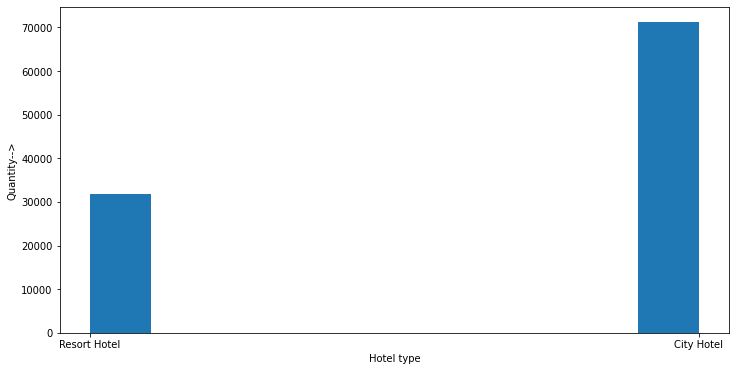

In [ ]:
fig, ax= plt.subplots(figsize=(12,6))
ax.hist(data['Hotel'])
ax.set_xlabel('Hotel type')
ax.set_ylabel('Quantity-->')
plt.show()

<Figure size 1440x1080 with 0 Axes>

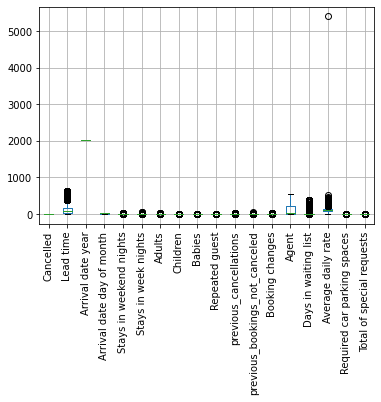

<Figure size 1440x1080 with 0 Axes>

In [ ]:
data.boxplot()
plt.xticks(rotation=90)
plt.figure(figsize=(20,15))

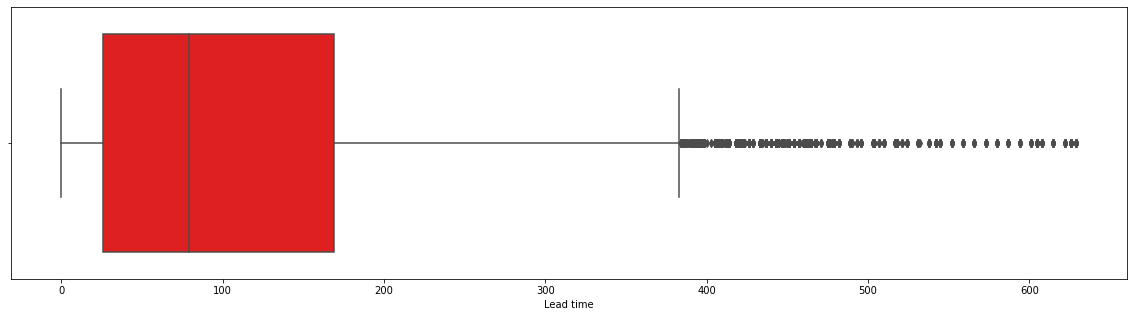

In [ ]:
#plotting boxplot to find outliers
#plot for lead_time variable
plt.figure(figsize=(20,5))
sns.boxplot(x=data['Lead time'],color='Red')

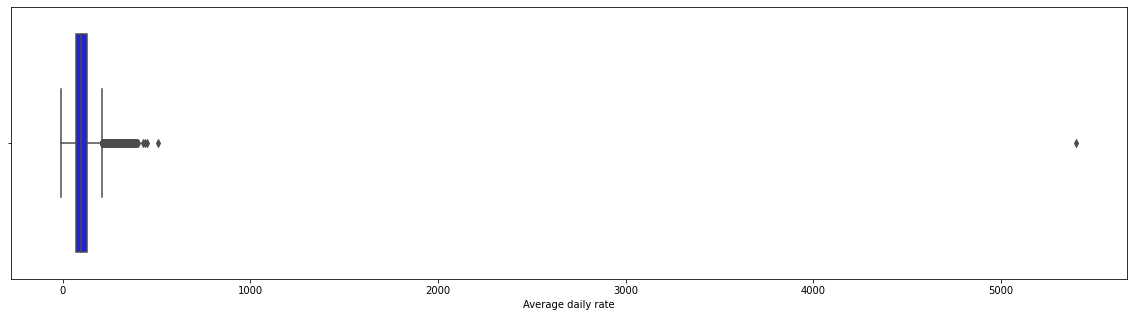

In [ ]:
#plotting boxplot to find outliers
#plot for Average daily rate variable
plt.figure(figsize=(20,5))
sns.boxplot(x=data['Average daily rate'],color='Blue')

In [ ]:
#Dropping outliers
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR =  q3 - q1
print("\nInternalQuartileRange=\n",IQR)
data1 = data[~((data < (q1 - 1.5 * IQR)) |(data > (q3 + 1.5 * IQR))).any(axis=1)]
data1.head(5)
data1.shape


InternalQuartileRange=
 Cancelled                           1.0
Lead time                         143.0
Arrival date year                   1.0
Arrival date day of month          16.0
Stays in weekend nights             2.0
Stays in week nights                2.0
Adults                              0.0
Children                            0.0
Babies                              0.0
Repeated guest                      0.0
previous_cancellations              0.0
previous_bookings_not_canceled      0.0
Booking changes                     0.0
Agent                             220.0
Days in waiting list                0.0
Average daily rate                 54.8
Required car parking spaces         0.0
Total of special requests           1.0
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


(50688, 30)

In [ ]:
data.dtypes

Hotel                              object
Cancelled                           int64
Lead time                           int64
Arrival date year                   int64
Arrival date month                 object
Arrival date day of month           int64
Stays in weekend nights             int64
Stays in week nights                int64
Adults                              int64
Children                          float64
Babies                              int64
Meal                               object
Country                            object
Market segment                     object
Distribution channel               object
Repeated guest                      int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
Reserved room type                 object
Assigned room type                 object
Booking changes                     int64
deposit_type                       object
Agent                             float64
Days in waiting list              

In [ ]:
#Changing dtype to its correct dtype
data['Children']=data['Children'].astype(int)
data['Agent']=data['Agent'].astype(int)


**Data** **Visualisation**

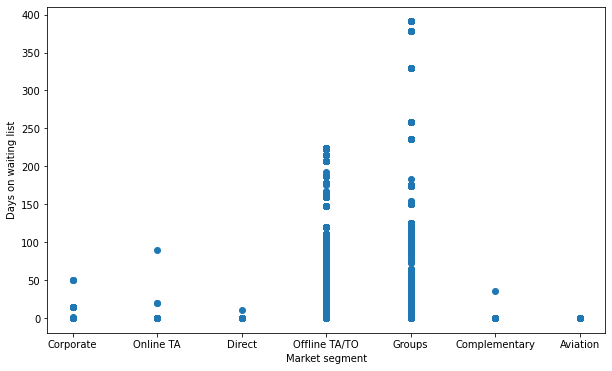

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
#plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots
ax.scatter(data['Market segment'], data['Days in waiting list'])
ax.set_xlabel('Market segment')
ax.set_ylabel('Days on waiting list')
plt.show()

<function matplotlib.pyplot.show>

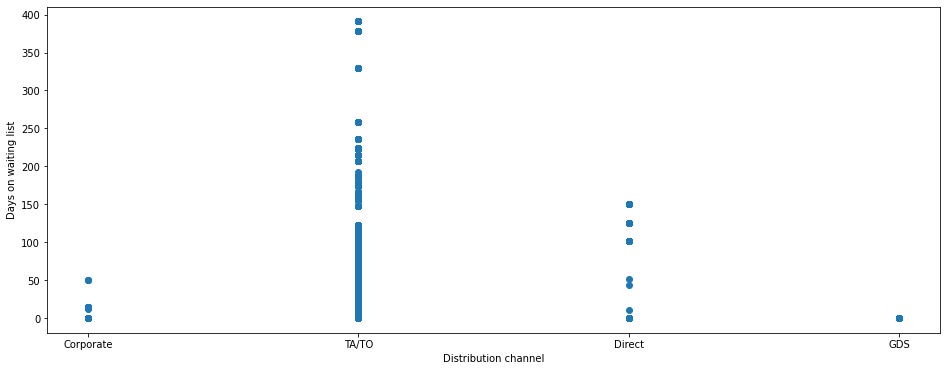

In [ ]:
fig,ax = plt.subplots(figsize=(16,6))
#plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots
ax.scatter(data['Distribution channel'], data['Days in waiting list'])
ax.set_xlabel('Distribution channel')
ax.set_ylabel('Days on waiting list')
plt.show

In [ ]:
grp=data.groupby('Arrival date month')
p=grp['Lead time'].agg(np.mean)
q=grp['Stays in week nights'].agg(np.mean)
r=grp['Stays in weekend nights'].agg(np.mean)
s=grp['Booking changes'].agg(np.sum)
t=grp['Days in waiting list'].agg(np.sum)
u=grp['Average daily rate'].agg(np.mean)
v=grp['Hotel'].agg(np.sum)
print(p)
print(q)
print(r)
print(s)
print(t)
print(u)
print(v)

Arrival date month
April        100.097578
August       128.670533
December      82.120463
February      53.132971
January       53.774087
July         142.900078
June         134.132102
March         77.650516
May          124.448201
November      78.870089
October      129.648723
September    141.820104
Name: Lead time, dtype: float64
Arrival date month
April        2.472399
August       2.882339
December     2.490036
February     2.302250
January      2.411351
July         2.857919
June         2.702948
March        2.633669
May          2.483989
November     2.619718
October      2.294055
September    2.565190
Name: Stays in week nights, dtype: float64
Arrival date month
April        0.990150
August       1.081676
December     0.951957
February     0.957642
January      0.860317
July         1.145357
June         0.946139
March        0.929661
May          0.906612
November     0.840623
October      0.932182
September    0.984061
Name: Stays in weekend nights, dtype: float64
Arriva

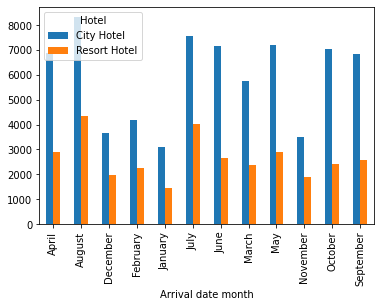

In [ ]:
data1=data.groupby(['Arrival date month','Hotel']).size()
data1=data1.unstack()
data1.plot(kind='bar')

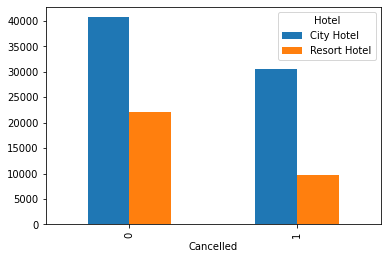

In [ ]:
data2=data.groupby(['Cancelled','Hotel']).size()
data2=data2.unstack()
data2.plot(kind='bar')

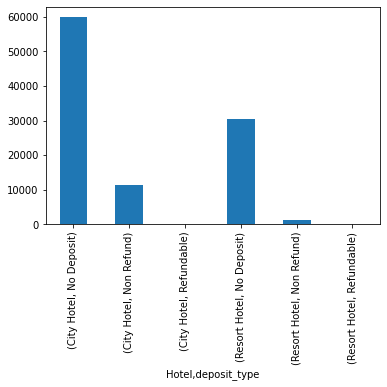

In [ ]:
data3=data.groupby(['Hotel','deposit_type']).size()
#data3=data3.unstack()
data3.plot(kind='bar')

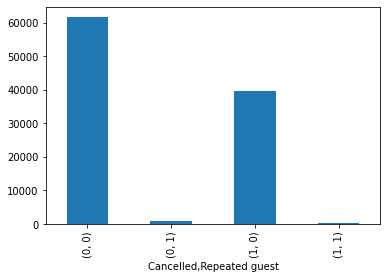

In [ ]:
data4=data.groupby(['Cancelled','Repeated guest']).size()
#data4=data4.unstack()
data4.plot(kind='bar')

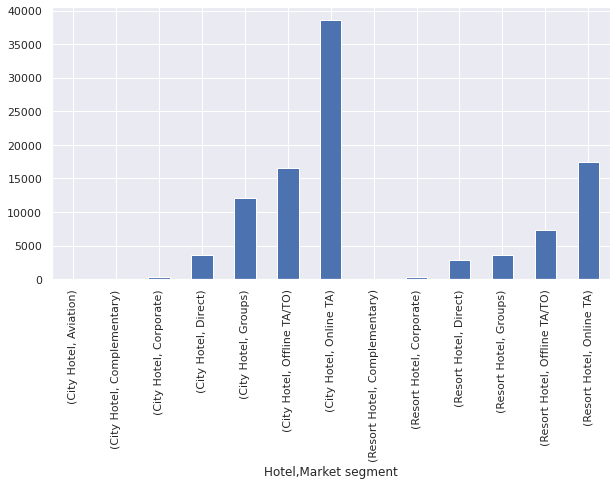

In [ ]:
#fig, ax = plt.subplots(figsize=(16,6))
data5=data.groupby(['Hotel','Market segment']).size()
data5=data5.plot(kind='bar', figsize=(10,5))

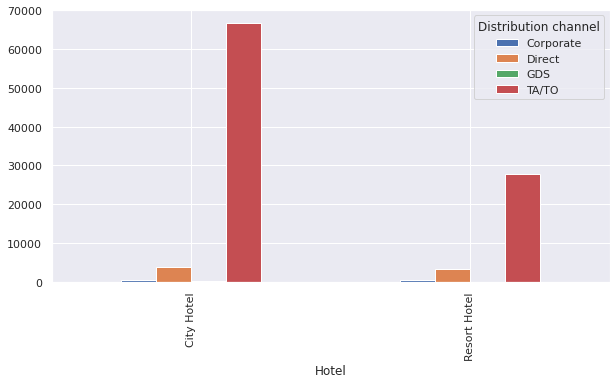

In [ ]:
data6=data.groupby(['Hotel','Distribution channel']).size()
data6=data6.unstack()
data6.plot(kind='bar',figsize=(10,5))

In [ ]:
datashort= pd.DataFrame(data,columns=['Total of special requests','babies','children','adult'])
corrMatrix = datashort.corr()
print(corrMatrix)

                           Total of special requests  babies  children  adult
Total of special requests                        1.0     NaN       NaN    NaN
babies                                           NaN     NaN       NaN    NaN
children                                         NaN     NaN       NaN    NaN
adult                                            NaN     NaN       NaN    NaN


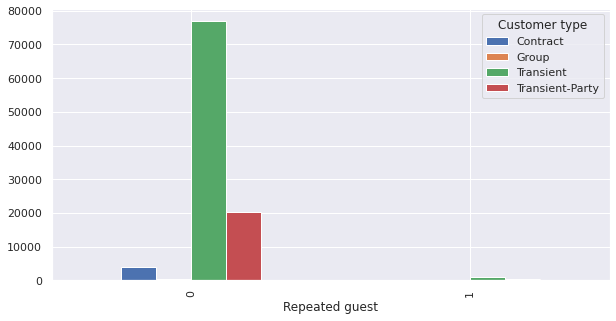

In [ ]:
data7=data.groupby(['Repeated guest','C
ustomer type']).size()
data7=data7.unstack()
data7.plot(kind='bar',figsize=(10,5))

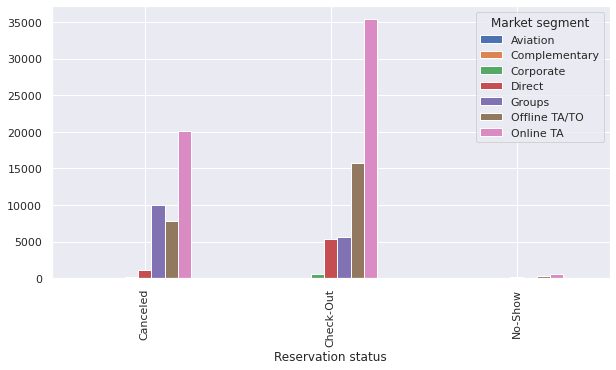

In [ ]:
data8=data.groupby(['Reservation status','Market segment']).size()
data8=data8.unstack()
data8.plot(kind='bar',figsize=(10,5))

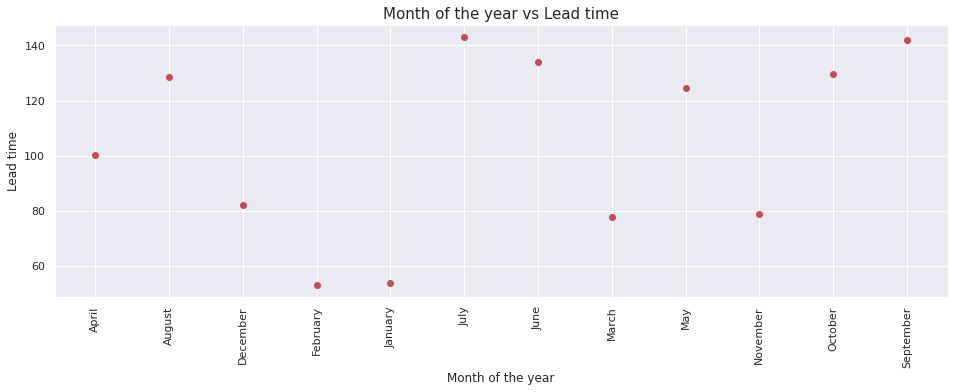

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(p,'ro',color='r')
plt.xticks(rotation=90)
plt.title('Month of the year vs Lead time',fontsize=15)
plt.xlabel('Month of the year')
plt.ylabel('Lead time')
plt.show()

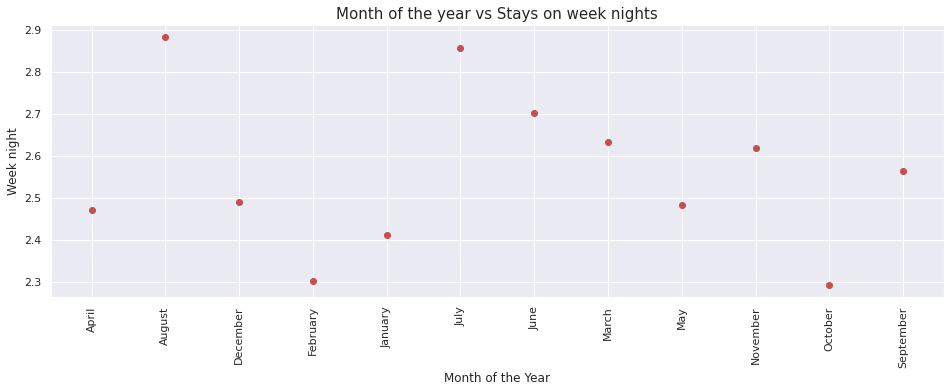

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(q,'ro',color='r')
plt.xticks(rotation=90)
plt.title('Month of the year vs Stays on week nights',fontsize=15)
plt.xlabel('Month of the Year')
plt.ylabel('Week night')
plt.show()

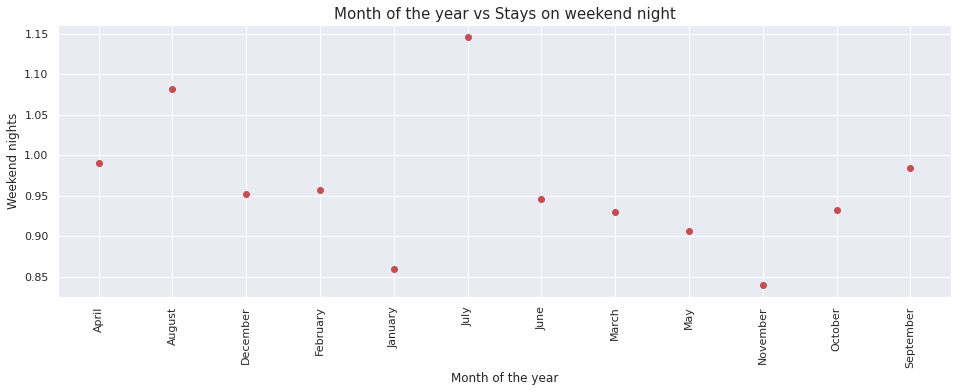

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(r,'ro',color='r')
plt.xticks(rotation=90)
plt.title('Month of the year vs Stays on weekend night',fontsize=15)
plt.xlabel('Month of the year')
plt.ylabel('Weekend nights')
plt.show()

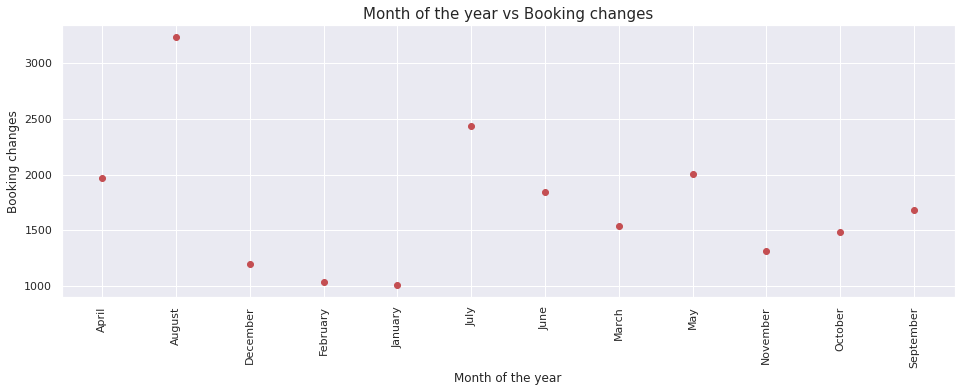

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(s,'ro',color='r')
plt.xticks(rotation=90)
plt.title('Month of the year vs Booking changes',fontsize=15)
plt.xlabel('Month of the year')
plt.ylabel('Booking changes')
plt.show()

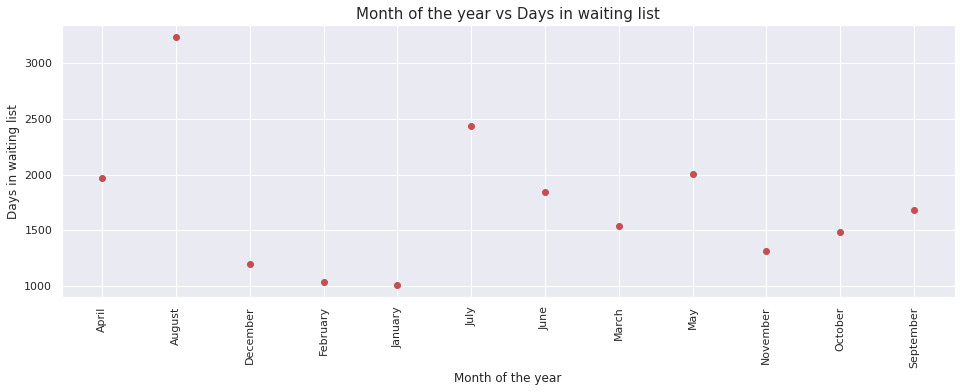

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(s,'ro',color='r')
plt.xticks(rotation=90)
plt.title('Month of the year vs Days in waiting list',fontsize=15)
plt.xlabel('Month of the year')
plt.ylabel('Days in waiting list')
plt.show()

,Cancelled,Lead time,Arrival date year,Arrival date day of month,Stays in weekend nights,Stays in week nights,Adults,Children,Babies,Repeated guest,previous_cancellations,previous_bookings_not_canceled,Booking changes,Agent,Days in waiting list,Average daily rate,Required car parking spaces,Total of special requests
Cancelled,1.000000,0.277666,0.004561,-0.005468,-0.023589,0.003918,0.037057,0.005409,-0.032038,-0.029913,0.117983,-0.042589,-0.131714,-0.081939,0.052475,0.023284,-0.188298,-0.257934
Lead time,0.277666,1.000000,0.041082,-0.003472,0.047674,0.124195,0.072477,-0.049796,-0.021975,-0.055432,0.100271,-0.045082,-0.000282,-0.068753,0.170352,-0.112652,-0.111226,-0.123047
Arrival date year,0.004561,0.041082,1.000000,0.005206,0.020693,0.032807,0.061359,0.065394,-0.009828,-0.022428,-0.134031,0.015334,0.036468,0.063684,-0.061742,0.222059,-0.012864,0.121490
Arrival date day of month,-0.005468,-0.003472,0.005206,1.000000,-0.016510,-0.030852,0.001151,0.013545,-0.002426,-0.008447,-0.024869,0.001447,0.011505,0.001731,0.024778,0.025590,0.004745,0.002560
Stays in weekend nights,-0.023589,0.047674,0.020693,-0.016510,1.000000,0.486350,0.070997,0.039961,0.020068,-0.056987,-0.003021,-0.028041,0.054693,0.141387,-0.064610,0.016233,-0.011037,0.056110
Stays in week nights,0.003918,0.124195,0.032807,-0.030852,0.486350,1.000000,0.071890,0.039922,0.021008,-0.057415,-0.013591,-0.029082,0.081598,0.183281,-0.009330,0.036263,-0.016376,0.050318
Adults,0.037057,0.072477,0.061359,0.001151,0.070997,0.071890,1.000000,0.014385,0.013307,-0.073802,-0.003366,-0.054299,-0.051995,-0.034489,-0.022945,0.237099,0.036907,0.116793
Children,0.005409,-0.049796,0.065394,0.013545,0.039961,0.039922,0.014385,1.000000,0.016742,-0.018975,-0.025070,-0.009899,0.055324,0.041242,-0.036455,0.335729,0.065531,0.068130
Babies,-0.032038,-0.021975,-0.009828,-0.002426,0.020068,0.021008,0.013307,0.016742,1.000000,-0.006906,-0.007150,-0.002595,0.094213,0.036338,-0.010894,0.025584,0.039087,0.091729
Repeated guest,-0.029913,-0.055432,-0.022428,-0.008447,-0.056987,-0.057415,-0.073802,-0.018975,-0.006906,1.000000,0.073284,0.396805,-0.000578,0.031624,-0.015835,-0.092619,0.028749,0.004312


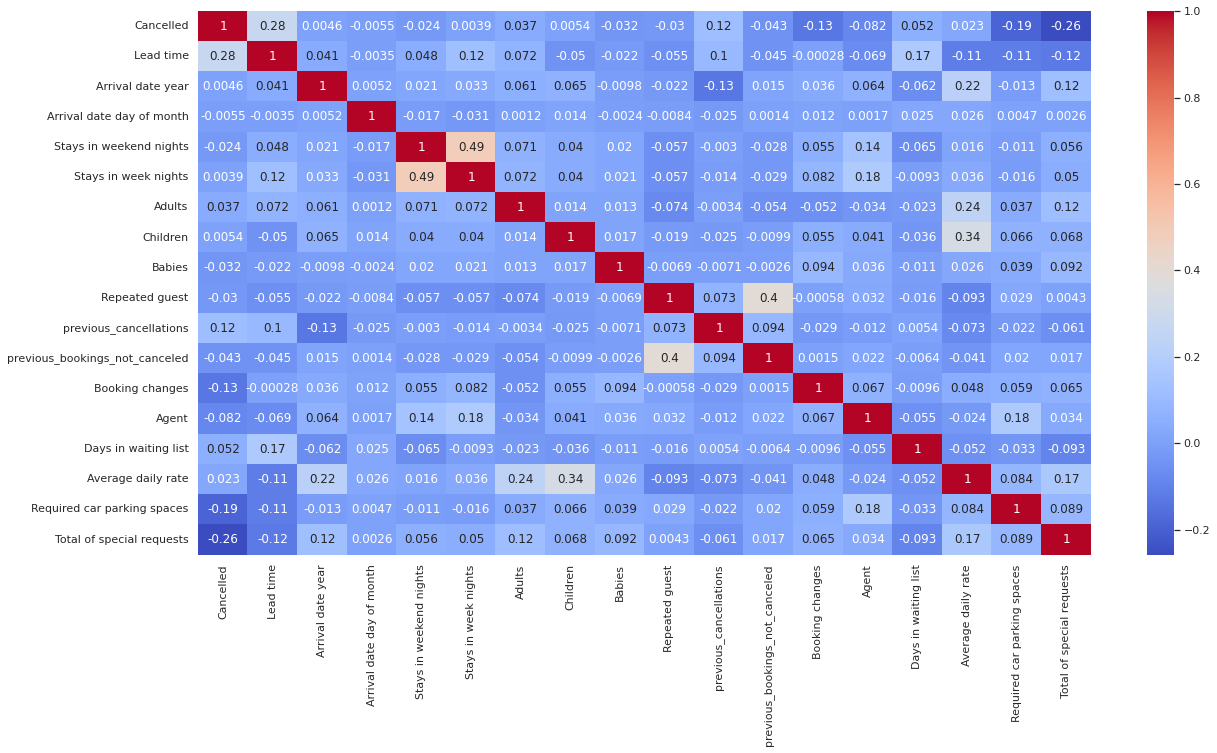

In [ ]:
#heatmap 
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= data.corr()
sns.heatmap(c,cmap="coolwarm",annot=True) #BrBG, RdGy, coolwarm
c

**Data** **Modeling**

In [ ]:
data.shape

(102894, 30)

In [ ]:
total_cancellations = data["Cancelled"].sum()
print(total_cancellations)
resort_hotel_cancelations = data.loc[data["Hotel"] == "Resort Hotel"]["Cancelled"].sum()
print(resort_hotel_cancelations)
city_hotel_cancelations = data.loc[data["Hotel"] == "City Hotel"]["Cancelled"].sum()
print(city_hotel_cancelations)

40161
9684
30477


In [ ]:
#as percent:
rel_cancel = total_cancellations / data.shape[0] * 100
rh_rel_cancel = resort_hotel_cancelations / data.loc[data["Hotel"] == "Resort Hotel"].shape[0] * 100
ch_rel_cancel = city_hotel_cancelations / data.loc[data["Hotel"] == "City Hotel"].shape[0] * 100

print(f"Total booking canceled: {total_cancellations:,} ({rel_cancel:.0f} %)")
print(f"Resort hotel bookings canceled: {resort_hotel_cancelations:,} ({rh_rel_cancel:.0f} %)")
print(f"City hotel booking canceled: {city_hotel_cancelations:,} ({ch_rel_cancel:.0f} %)")

Total booking canceled: 40,161 (39 %)
Resort hotel bookings canceled: 9,684 (31 %)
City hotel booking canceled: 30,477 (43 %)


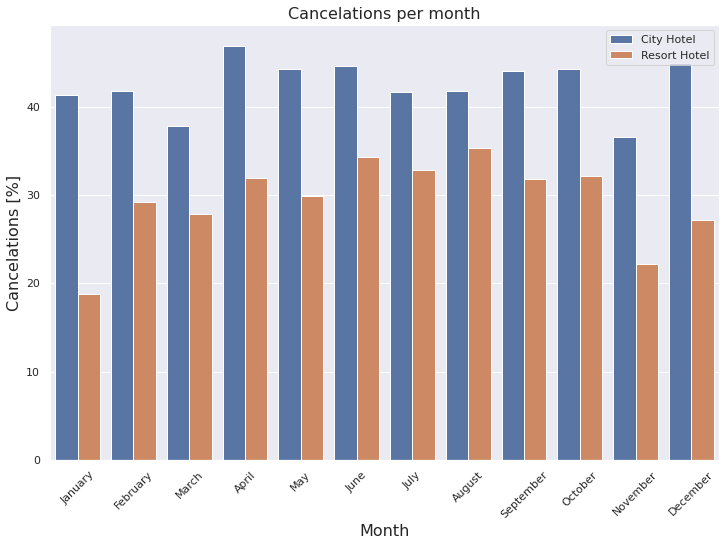

In [ ]:
#Create a DataFrame with the relevant data:
res_book_per_month = data.loc[(data["Hotel"] == "Resort Hotel")].groupby("Arrival date month")["Hotel"].count()
res_cancel_per_month = data.loc[(data["Hotel"] == "Resort Hotel")].groupby("Arrival date month")["Cancelled"].sum()

city_book_per_month = data.loc[(data["Hotel"] == "City Hotel")].groupby("Arrival date month")["Hotel"].count()
city_cancel_per_month = data.loc[(data["Hotel"] == "City Hotel")].groupby("Arrival date month")["Cancelled"].sum()

res_cancel_data= pd.DataFrame({"Hotel": "Resort Hotel","Month": list(res_book_per_month.index),
                               "Bookings": list(res_book_per_month.values),
                               "Cancelations": list(res_cancel_per_month.values)})
city_cancel_data= pd.DataFrame({"Hotel": "City Hotel",
                               "Month": list(city_book_per_month.index),
                               "Bookings": list(city_book_per_month.values),
                               "Cancelations": list(city_cancel_per_month.values)})

full_cancel_data = pd.concat([res_cancel_data, city_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

#order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories= ordered_months, ordered=True)

#show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y= "cancel_percent", hue= "Hotel",
            hue_order= ["City Hotel", "Resort Hotel"], data=full_cancel_data)
plt.title("Cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()
  